In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 通道交换

## 方法1

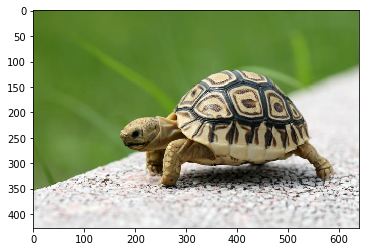

In [2]:
img = cv2.imread("./images/turtle.jpg") # bgr  flag=1==> color; flag=0==>gray
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# BGR --> RGB
img[:, :, 0] = r
img[:, :, 1] = g
img[:, :, 2] = b

plt.imshow(img)

## 方法2

In [3]:
img = cv2.imread('./images/turtle.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度化(Grayscale)

## 方法1

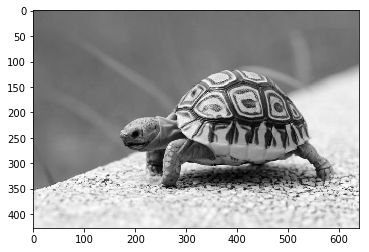

In [4]:
# 方法1
grayscale = 0.2126*r + 0.7152*g + 0.0722*b 
grayscale = grayscale.astype(np.uint8)
plt.imshow(grayscale, cmap='gray')

## 方法2

[[100 100 100 ... 112 112 112]
 [100 100 100 ... 112 112 112]
 [100 100 100 ... 112 112 112]
 ...
 [236 236 236 ... 228 224 221]
 [236 236 236 ... 230 226 223]
 [236 236 236 ... 233 229 226]]


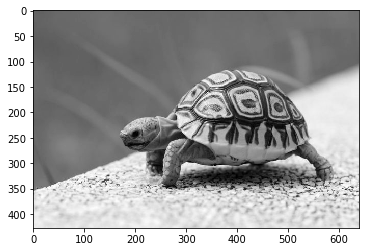

In [5]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(grayscale)
plt.imshow(grayscale, cmap='gray')

# 二值化

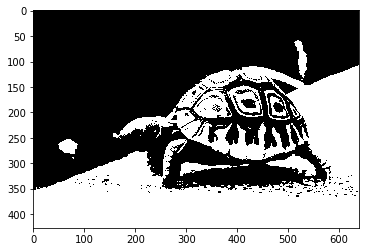

In [6]:
th = 128
out = grayscale.copy()
out[out < th] = 0
out[out >= th] = 255
plt.imshow(out, cmap='gray')

## 大津二值化算法(Otsu's Method)

大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法，从类内方差和类间方差的比值计算得来：

threshold:  161


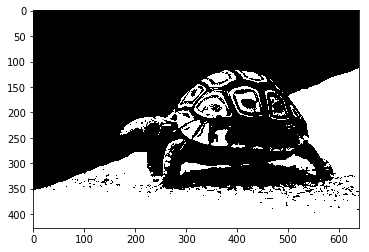

In [7]:
max_sigma = 0
max_t = 0
out = grayscale
H, W = out.shape
for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H*W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0. 
    w1 = len(v1) / (H*W)
    sigma = w0 *w1 * ((m0-m1)**2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t
print("threshold: ", max_t)
th = max_t
out[out < th] = 0
out[out > th] = 255
plt.imshow(out, cmap='gray')

# HSV变换

HSV 即使用**色相（Hue）、饱和度（Saturation）、明度（Value）**来表示色彩的一种方式。

色相：将颜色使用0到360度表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应：

红	黄	绿	青色	蓝色	品红	红
0	60	120	180	240	300	360
饱和度：是指色彩的纯度，饱和度越低则颜色越黯淡( 0<= S < 1)；

明度：即颜色的明暗程度。数值越高越接近白色，数值越低越接近黑色 ( 0 <= V < 1)；

从 RGB 色彩表示转换到 HSV 色彩表示通过以下方式计算：

R,G,B的值在[0, 1]之间：

        Max = max(R,G,B)
        Min = min(R,G,B)

        H =  { 0                            (if Min=Max)
               60 x (G-R) / (Max-Min) + 60  (if Min=B)
               60 x (B-G) / (Max-Min) + 180 (if Min=R)
               60 x (R-B) / (Max-Min) + 300 (if Min=G)
               }

        V = Max

        S = Max - Min

从 HSV 色彩表示转换到 RGB 色彩表示通过以下方式计算：

        C = S

        H' = H / 60

        X = C (1 - |H' mod 2 - 1|)

        (R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                                      (C, X, 0)  (if 0 <= H' < 1)
                                      (X, C, 0)  (if 1 <= H' < 2)
                                      (0, C, X)  (if 2 <= H' < 3)
                                      (0, X, C)  (if 3 <= H' < 4)
                                      (X, 0, C)  (if 4 <= H' < 5)
                                      (C, 0, X)  (if 5 <= H' < 6)}
请将色相反转（色相值加180），然后再用 RGB 色彩空间表示图片。

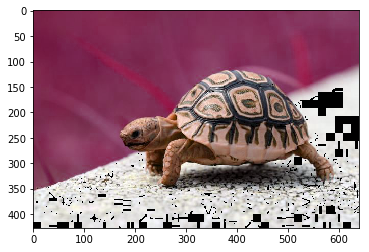

In [12]:
# BGR > HSV
# Read image
img = cv2.imread("./images/turtle.jpg").astype(np.float32) / 255.

# RGB > HSV
# out = np.zeros_like(img)

# max_v = np.max(img, axis=2).copy()
# min_v = np.min(img, axis=2).copy()
# min_arg = np.argmin(img, axis=2)

# H = np.zeros_like(max_v)

# H[np.where(max_v == min_v)] = 0
# ## if min == B
# ind = np.where(min_arg == 0)
# H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
# ## if min == R
# ind = np.where(min_arg == 2)
# H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
# ## if min == G
# ind = np.where(min_arg == 1)
# H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
# V = max_v.copy()
# S = max_v.copy() - min_v.copy()

# # Transpose Hue
# H = (H + 180) % 360

# # HSV > RGB

# C = S
# H_ = H / 60
# X = C * (1 - np.abs( H_ % 2 - 1))
# Z = np.zeros_like(H)

# vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

# for i in range(6):
#     ind = np.where((i <= H_) & (H_ < (i+1)))
#     out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
#     out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
#     out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

# out[np.where(max_v == min_v)] = 0
# out = (out * 255).astype(np.uint8) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(out, cmap='gray')